In [1]:
!pip install joblib fastapi uvicorn scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib

In [115]:
df = pd.read_csv(r"C:\\Users\\pavit\\Downloads\\credit_card_fraud_10k.csv")
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [116]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [117]:
print(df.duplicated().sum())

0


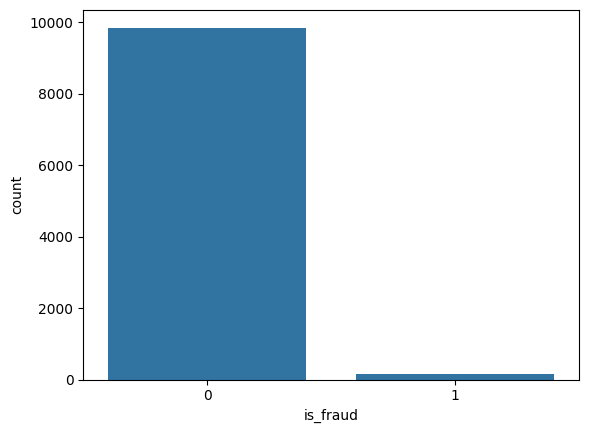

In [118]:
sns.countplot(x = 'is_fraud', data=df)
plt.show()

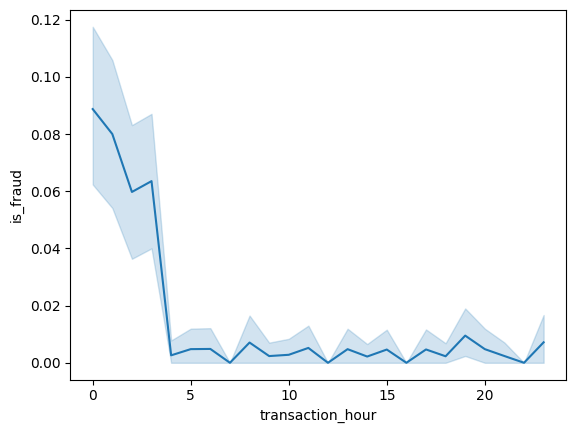

In [119]:
sns.lineplot(x='transaction_hour', y='is_fraud', data=df)
plt.show()

C:\Users\pavit\AppData\Local\Temp\ipykernel_2176\1511584111.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('amount_bin')['is_fraud']


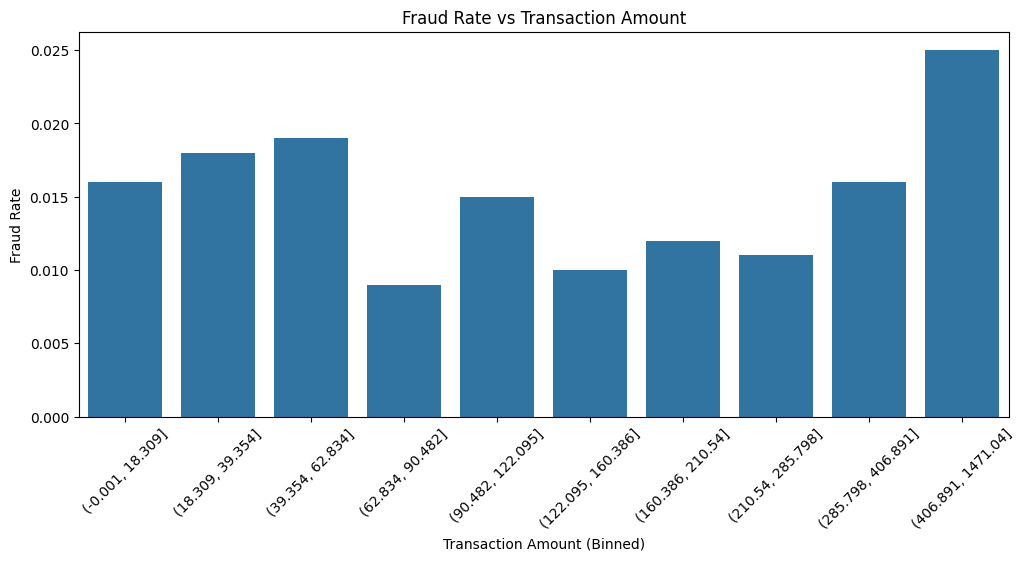

In [120]:
df['amount_bin'] = pd.qcut(
    df['amount'],
    q=10            
)
fraud_rate_by_amount = (
    df.groupby('amount_bin')['is_fraud']
      .mean()
      .reset_index()
)
plt.figure(figsize=(12, 5))

sns.barplot(
    data=fraud_rate_by_amount,
    x='amount_bin',
    y='is_fraud'
)
plt.xticks(rotation=45)
plt.xlabel("Transaction Amount (Binned)")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate vs Transaction Amount")
plt.show()

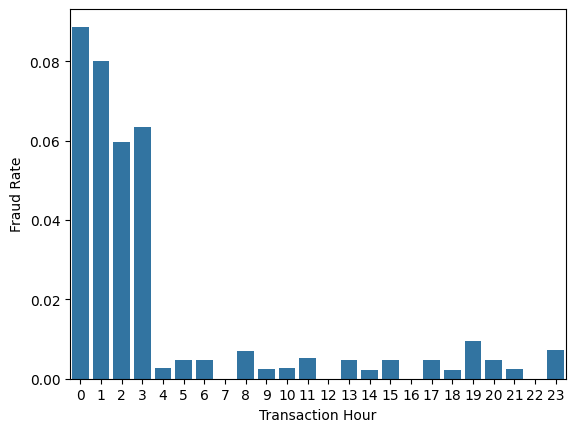

In [121]:
fraud_rate = (
    df.groupby('transaction_hour')['is_fraud']
      .mean()
      .reset_index()
)

plt.figure()
sns.barplot(
    data=fraud_rate,
    x='transaction_hour',
    y='is_fraud'
)
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Hour")
plt.show()


In [122]:
df['hour_sin'] = np.sin(2 * np.pi * df['transaction_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['transaction_hour'] / 24)
df = df.drop(columns=['transaction_hour'])
df.head()

,transaction_id,amount,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_bin,hour_sin,hour_cos
0,1,84.47,Electronics,0,0,66,3,40,0,"(62.834, 90.482]",-0.500000,0.866025
1,2,541.82,Travel,1,0,87,1,64,0,"(406.891, 1471.04]",0.707107,0.707107
2,3,237.01,Grocery,0,0,49,1,61,0,"(210.54, 285.798]",-0.965926,-0.258819
3,4,164.33,Grocery,0,1,72,3,34,0,"(160.386, 210.54]",0.866025,0.500000
4,5,30.53,Food,0,0,79,0,44,0,"(18.309, 39.354]",-0.707107,-0.707107


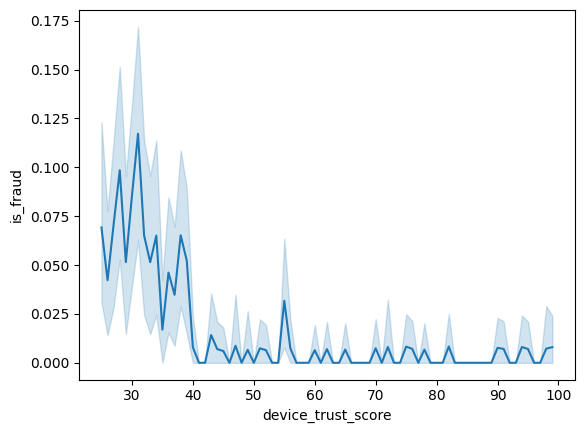

In [123]:
sns.lineplot(x = 'device_trust_score', y='is_fraud', data=df)
plt.show()

In [124]:
cond1 = ((df['device_trust_score'] < 50) & (df['is_fraud'] == 1)).sum()
cond2 = (df['is_fraud'] == 1).sum()
print(cond1 / cond2)

0.8543046357615894


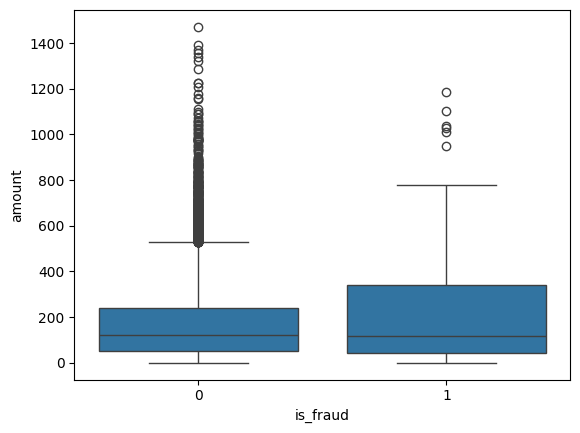

In [125]:
plt.figure()
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.show()

In [126]:
print(f"Amount greater than 500 bucks and is fraud : {((df['amount'] >= 500) & (df['is_fraud'] == 1)).sum()}")
print(f"Average transaction amount : {df['amount'].mean()}")

Amount greater than 500 bucks and is fraud : 16
Average transaction amount : 175.94984899999997


In [127]:
print(f"{((df['foreign_transaction'] == 1) & (df['location_mismatch'] == 1) & (df['is_fraud'] == 1)).sum()}")

29


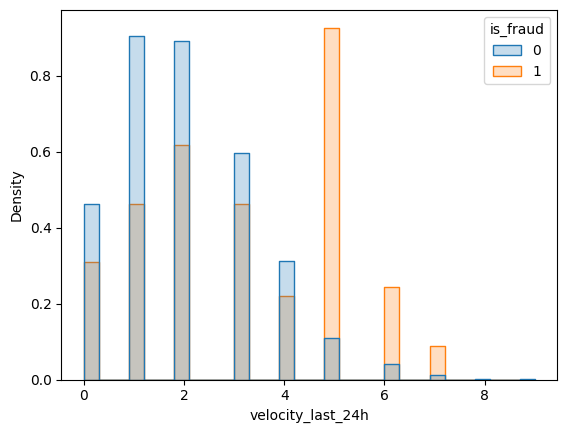

In [128]:
plt.figure()
sns.histplot(
    data=df,
    x='velocity_last_24h',
    hue='is_fraud',
    bins=30,
    element='step',
    stat='density',
    common_norm=False
)
plt.show()

Velocity_last_24h which represents number of transactions attempted in the last 24hours. One of the high ROI feature for is_fraud

In [129]:
freq_map = (
    df["merchant_category"]
    .value_counts()
    .to_dict()
)

df["merchant_category_frequency"] = (
    df["merchant_category"]
    .map(freq_map)
)


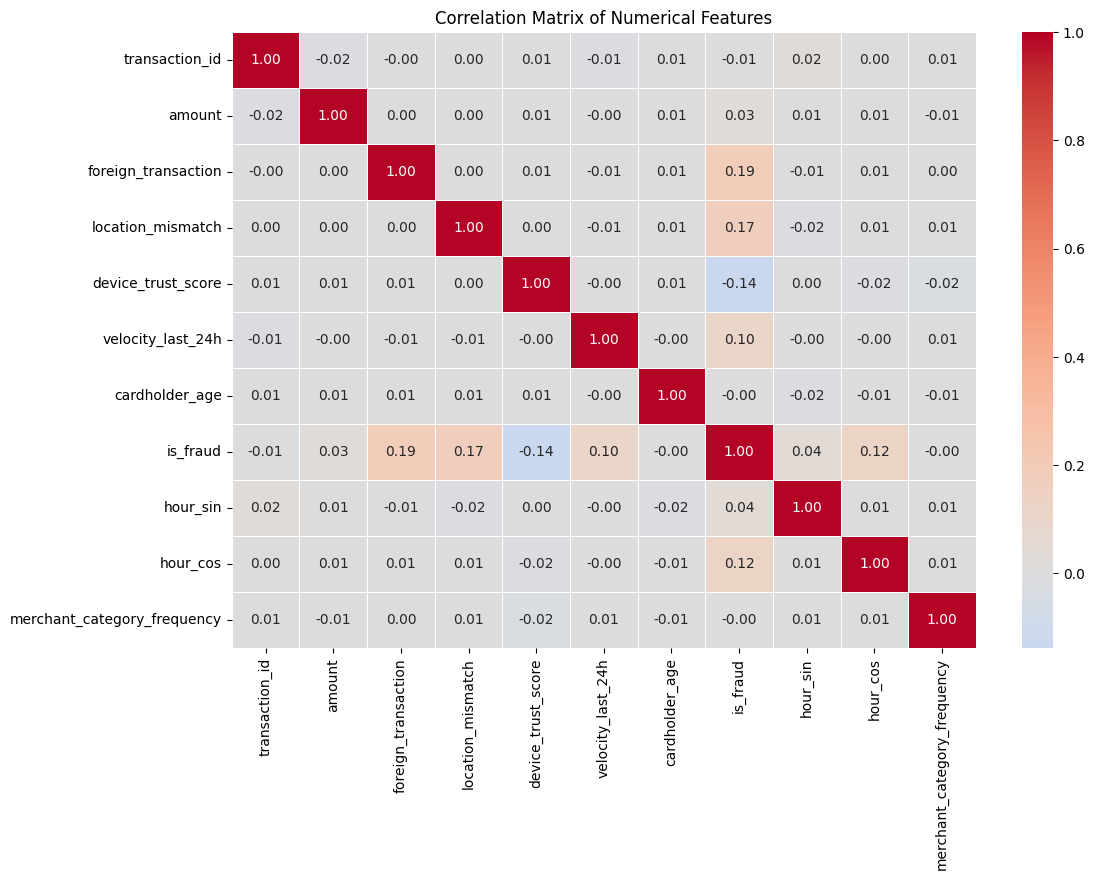

In [130]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [131]:
df.head()

,transaction_id,amount,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_bin,hour_sin,hour_cos,merchant_category_frequency
0,1,84.47,Electronics,0,0,66,3,40,0,"(62.834, 90.482]",-0.500000,0.866025,1923
1,2,541.82,Travel,1,0,87,1,64,0,"(406.891, 1471.04]",0.707107,0.707107,1990
2,3,237.01,Grocery,0,0,49,1,61,0,"(210.54, 285.798]",-0.965926,-0.258819,1944
3,4,164.33,Grocery,0,1,72,3,34,0,"(160.386, 210.54]",0.866025,0.500000,1944
4,5,30.53,Food,0,0,79,0,44,0,"(18.309, 39.354]",-0.707107,-0.707107,2093


In [132]:
df = pd.get_dummies(
    df,
    columns=['merchant_category'],
    prefix='mcc',
    drop_first=False   
)
df.head()

,transaction_id,amount,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_bin,hour_sin,hour_cos,merchant_category_frequency,mcc_Clothing,mcc_Electronics,mcc_Food,mcc_Grocery,mcc_Travel
0,1,84.47,0,0,66,3,40,0,"(62.834, 90.482]",-0.500000,0.866025,1923,False,True,False,False,False
1,2,541.82,1,0,87,1,64,0,"(406.891, 1471.04]",0.707107,0.707107,1990,False,False,False,False,True
2,3,237.01,0,0,49,1,61,0,"(210.54, 285.798]",-0.965926,-0.258819,1944,False,False,False,True,False
3,4,164.33,0,1,72,3,34,0,"(160.386, 210.54]",0.866025,0.500000,1944,False,False,False,True,False
4,5,30.53,0,0,79,0,44,0,"(18.309, 39.354]",-0.707107,-0.707107,2093,False,False,True,False,False


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, recall_score, precision_score
X = df.drop(columns=['is_fraud', 'transaction_id', 'amount_bin'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 40)
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = None,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=40,
    n_jobs= -1
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [134]:
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc  = average_precision_score(y_test, y_prob)
for t in [0.3, 0.5, 0.7, 0.85]:
    y_pred = (y_prob >= t).astype(int)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f} | Recall={r:.4f}")
for t in [0.30, 0.50, 0.70, 0.85]:
    y_pred = (y_prob >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f} | Precision={p:.4f} | Recall={r:.4f}")
print("ROC-AUC:", roc_auc)
print("PR-AUC :", pr_auc)

Threshold=0.30 | Recall=0.9333
Threshold=0.50 | Recall=0.6000
Threshold=0.70 | Recall=0.3667
Threshold=0.85 | Recall=0.0667
Threshold=0.30 | Precision=0.5957 | Recall=0.9333
Threshold=0.50 | Precision=1.0000 | Recall=0.6000
Threshold=0.70 | Precision=1.0000 | Recall=0.3667
Threshold=0.85 | Precision=1.0000 | Recall=0.0667
ROC-AUC: 0.9966497461928934
PR-AUC : 0.9171012076702265


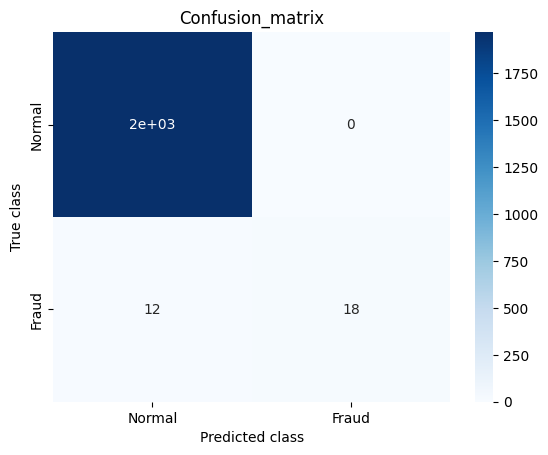

In [135]:
y_pred = (y_prob >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title("Confusion_matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

In [136]:
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [137]:
joblib.dump(freq_map, "freq_map.pkl")

['freq_map.pkl']

In [138]:
joblib.dump(global_mean, "global_mean.pkl")

['global_mean.pkl']